In [1]:
import pandas as pd
import numpy as np
import time
import datetime
from datetime import date, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
year = ['2010', '2011', '2012', '2013', '2014', '2015', '2016' ,'2017', '2018', '2019']
gen = ['male', 'female']

In [17]:
temp = pd.read_excel('olympic_weather.xlsx', sheet_name='boston_marathon')

In [19]:
del temp['date']

In [149]:
for y in year:
    for g in gen:
        df = pd.read_csv('boston_marathon/boston_' + y + '_' + g +'.txt', delimiter = ",")
        
        df['year'] = y
        df['gender'] = g

        df.to_csv('boston_marathon/boston_' + y + '_' + g +'.csv')

In [3]:
df = pd.DataFrame()
for y in year:
    for g in gen:
        file = pd.read_csv('boston_marathon/boston_' + y + '_' + g +'.csv')
        df = pd.concat([df, file])

In [4]:
df = df.reset_index()

In [5]:
for i in range(len(df)):
    if df.loc[i, 'OfficialTime'] != 'None':
        df.loc[i, 'OfficialTime'] = datetime.datetime.strptime(df.loc[i, 'OfficialTime'], '%H:%M:%S')

In [6]:
del df['Unnamed: 0']

In [7]:
df = df[['year', 'gender', 'BibNumber', 'FullName', 'SortName', 'AgeOnRaceDay', 'Gender', 'City',
       'StateAbbrev', 'StateName', 'Zip', 'CountryOfResAbbrev',
       'CountryOfResName', 'CountryOfCtzAbbrev', 'CountryOfCtzName',
       'OfficialTime', 'RankOverall', 'RankOverGender', 'RankOverDivision',
       'EventGroup', 'SubGroupLabel', 'SubGroup']]

In [8]:
df["OfficialTime"] = df["OfficialTime"].values.astype('datetime64[ns]')

In [9]:
df["OfficialTime"][0]

Timestamp('1900-01-01 02:05:52')

In [10]:
df_men = df[df['gender']=='male'].reset_index()
df_women = df[df['gender']=='female'].reset_index()

In [15]:
gold_records = []
top10_records = []
avg_time = []
std_time = []

for y in year:
    df_re = df_men[df_men['year']==int(y)].reset_index()
    
    gold_rec = df_re[df_re['RankOverGender']==1]['OfficialTime'][0].time()
    gold_records.append(gold_rec)
    
    top10_rec = df_re.iloc[:10]['OfficialTime'].mean().time()
    top10_records.append(top10_rec)
    
    avg_time.append(df_re['OfficialTime'].mean().time())
    std_time.append(np.std(df_re['OfficialTime']))
    
df_men_records = pd.DataFrame({'year' : year, 'gold_records':gold_records, 'top10_records':top10_records, 'avg_time': avg_time,  'std_time':std_time })

In [21]:
for i in range(len(df_men_records)):
    minute = df_men_records.loc[i, 'avg_time'].hour * 60 + df_men_records.loc[i, 'avg_time'].minute
    df_men_records.loc[i, 'avg_minute'] = minute
    
for i in range(len(df_men_records)):
    df_men_records.loc[i, 'std_seconds'] = df_men_records.loc[i, 'std_time'].seconds
    
for i in range(len(df_men_records)):
    sec = df_men_records.loc[i, 'gold_records'].hour * 60 *60 + df_men_records.loc[i, 'gold_records'].minute * 60 + df_men_records.loc[i, 'gold_records'].second
    df_men_records.loc[i, 'gold_records_re'] = sec
    
    sec_top10 = df_men_records.loc[i, 'top10_records'].hour * 60 *60 + df_men_records.loc[i, 'top10_records'].minute * 60 + df_men_records.loc[i, 'top10_records'].second
    df_men_records.loc[i, 'top10_records_re'] = sec_top10
    

In [26]:
df_men_records =df_men_records.astype({'year':'int64'})

In [27]:
df_men_records_re = pd.merge(df_men_records, temp, how='left', on='year')

In [32]:
df_men_records_re = df_men_records_re[['year', 'temp(Celcius)', 'wind(km/h)', 'humidity(%)', 'gold_records_re', 'top10_records_re', 'avg_minute', ]]

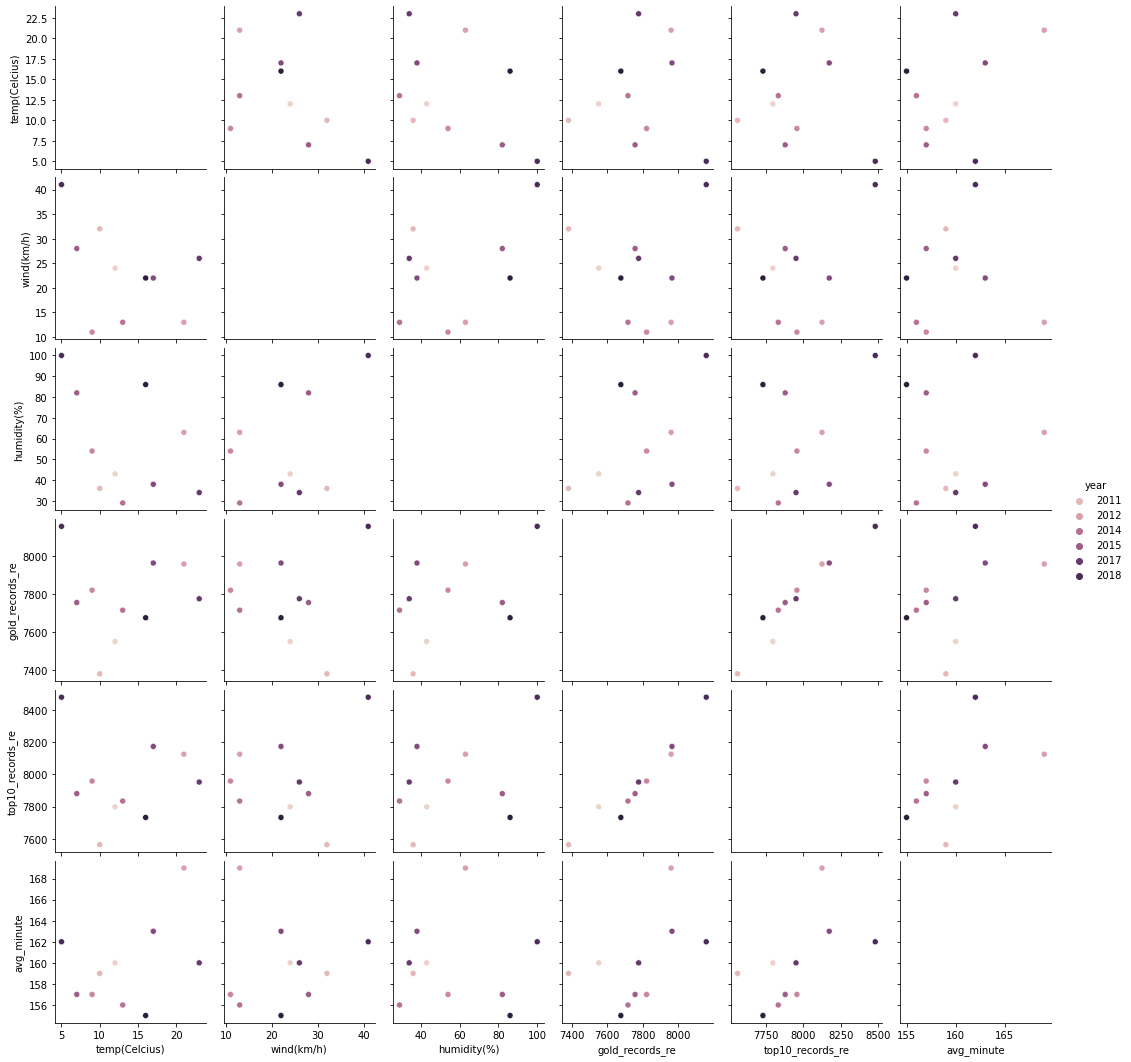

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_men_records_re, hue="year")
plt.show()

In [35]:
gold_records = []
top10_records = []
avg_time = []
std_time = []

for y in year:
    df_re = df_women[df_women['year']==int(y)].reset_index()
    
    gold_rec = df_re[df_re['RankOverGender']==1]['OfficialTime'][0].time()
    gold_records.append(gold_rec)
    
    top10_rec = df_re.iloc[:10]['OfficialTime'].mean().time()
    top10_records.append(top10_rec)
    
    avg_time.append(df_re['OfficialTime'].mean().time())
    std_time.append(np.std(df_re['OfficialTime']))
    
df_women_records = pd.DataFrame({'year' : year, 'gold_records':gold_records, 'top10_records':top10_records, 'avg_time': avg_time,  'std_time':std_time })

In [36]:
for i in range(len(df_women_records)):
    minute = df_women_records.loc[i, 'avg_time'].hour * 60 + df_women_records.loc[i, 'avg_time'].minute
    df_women_records.loc[i, 'avg_minute'] = minute
    
for i in range(len(df_women_records)):
    df_women_records.loc[i, 'std_seconds'] = df_women_records.loc[i, 'std_time'].seconds
    
for i in range(len(df_women_records)):
    sec = df_women_records.loc[i, 'gold_records'].hour * 60 *60 + df_women_records.loc[i, 'gold_records'].minute * 60 + df_women_records.loc[i, 'gold_records'].second
    df_women_records.loc[i, 'gold_records_re'] = sec
    
    sec_top10 = df_women_records.loc[i, 'top10_records'].hour * 60 *60 + df_women_records.loc[i, 'top10_records'].minute * 60 + df_women_records.loc[i, 'top10_records'].second
    df_women_records.loc[i, 'top10_records_re'] = sec_top10
    

In [37]:
df_women_records =df_women_records.astype({'year':'int64'})

In [38]:
df_women_records_re = pd.merge(df_women_records, temp, how='left', on='year')

In [39]:
df_women_records_re = df_women_records_re[['year', 'temp(Celcius)', 'wind(km/h)', 'humidity(%)', 'gold_records_re', 'top10_records_re', 'avg_minute', ]]

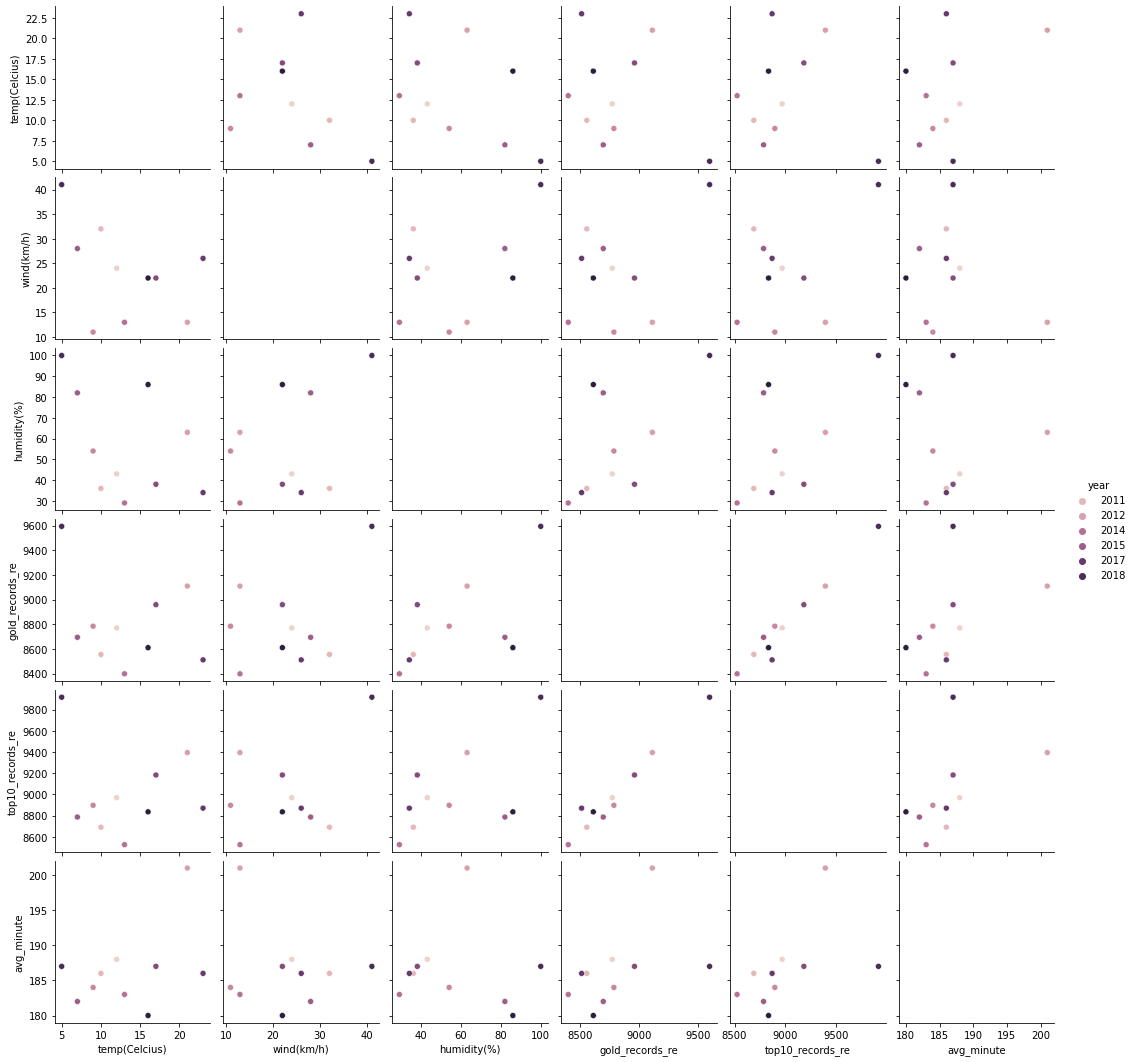

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_women_records_re, hue="year")
plt.show()